## Projet CHIM2-ON1 : pénétration de la barrière hémato-encéphalique. Approche sciences des données

### Présentation générale

Le jeu de données sur la pénétration de la barrière hémato-encéphalique (BBBP) est conçu pour la modélisation et la prédiction de la perméabilité de cette barrière. En tant que membrane séparant le sang circulant du liquide extracellulaire cérébral, la barrière hémato-encéphalique bloque la majorité des médicaments, des hormones et des neurotransmetteurs. La capacité à franchir cette barrière constitue donc un problème de longue date dans le développement de médicaments ciblant le système nerveux central.

Ce jeu de données comprend des étiquettes binaires décrivant les propriétés de perméabilité de plus de 2000 composés.

Le fichier CSV des données brutes contient les colonnes suivantes :
- `num` = index qui commence à 1
- `name` = nom du composé
- `smiles` = représentation SMILES de la structure moléculaire
- `p_np` = labels binaires pour la BBBP (1) ou non pénétration (0)

il est disponible ici : [moleculenet.org](https://moleculenet.org/datasets-1), rubrique physiology, cliquer sur BBBP va déclencher le téléchargement de `BBBP.csv`

**Ce projet vise à réaliser deux objectifs majeurs :**

- Caractériser les composés : Calculer et intégrer une série de descripteurs physico-chimiques (masse, polarité, etc.) pour chaque molécule du jeu de données, afin de voir si on peut rossièrement quantifier les propriétés qui régissent la pénétration de la BHE.
- Visualiser la similarité et la perméabilité : Utiliser la carte de similarité TMAP pour explorer visuellement si les composés qui franchissent la barrière (label 1) se regroupent en clusters distincts des non-pénétrants (label 0), fournissant ainsi un aperçu des exigences structurales et physico-chimiques clés.

S'il reste du temps, une analyse - toujours à l'aide de TMAP - des composés en termes de respect des règles de Lipinski et de Veber serait intéressante

### Plan de travail

- lire le fichier `BBBP.csv` sous forme de dataframe
- utiliser rdkit
    - d'abord pour nettoyer la base de données, en supprimant les SMILES qui posent problème du point de vue chimique (note : le MolFromSmiles de RDKit retourne `None` si le SMILES est invalide)
    - puis pour calculer des propriétés supplémentaires, qu'on appelle des descripteurs, qui seront ajoutées comme de nouvelles colonnes (une colonne par propriété). Pour cela, utiliser `rdMolDescriptors` (`from rdkit.Chem import rdMolDescriptors`). On calculera les descripteurs suivants. Utiliser plutôt wikipedia ou google pour chercher ce que c'est, si vous ne connaissez pas
```python
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Lipinski.NumHDonors(mol)
    hba = Lipinski.NumHAcceptors(mol)
    tpsa = Descriptors.TPSA(mol)
    rotatable_bonds = Descriptors.NumRotatableBonds(mol) # Rotatable Bond = toute liaison A-B qui permet la libre rotation de ses deux groupements A & B l'un par rapport à l'autre. Ce descripteur renvoie le nombre
    num_aromatic_rings = Descriptors.NumAromaticRings(mol)
    num_cycles = Descriptors.RingCount(mol)
    qed = Descriptors.qed(mol) # QED = Quantified Estimated Druglikeness, compris entre 0 & 1. Évalue à quel point une molécule ressemble à la moyenne des médicaments approuvés et commercialisés
    sp3_carbons = count_sp3_carbons(mol)
```
- tracer et sauver à fin d'affichage dans le notebook la TMAP qui permette de distinguer les composés qui passent ou non la barrière  hémato-encéphalique (icône d'appareil photo)
- identifier visuellement s'il y a des corrélations entre certains de ces descripteurs
- tracer **dans le notebook** quelques exemples de composés qui passent ou non la BHE, et identifier quelques motifs chimiques type

### Ressources utiles

- [rdkit cookbook](https://www.rdkit.org/docs/Cookbook.html)
- [lien pour tracer des tmaps en ligne](https://try-tmap.gdb.tools/)
    - copier coller une liste de smiles, avec des propriétés pour chaque molécule séparées par des virgules (charger l'exemple fourni sur le site web pour comprendre. En plus de vos données, tmap en calcule automatiquement)
    - garder "the default fingerprint is MHFP6". C'est une façon de transformer une chaîne de caractères SMILES en nombres caractéristiques (consulter [Molecular Representation notebook](https://github.com/rpoteau/pyPhysChem/blob/main/MolecularRepresentations.ipynb), paragraphe où il est montré qu'on transforme ainsi un chaîne de caractères SMILES en une sorte de code barre (barcode))
- **TMAP**: 
Une TMAP (Tree Map) est une technique de visualisation rapide conçue pour explorer de vastes ensembles de données chimiques, comme des librairies de molécules encodées en chaînes SMILES. Elle crée une carte de similarité bidimensionnelle où les composés chimiquement similaires (ayant des structures et des propriétés proches) sont reliés pour former une structure arborescente simplifiée et organisée. Cela permet d'identifier et de naviguer visuellement parmi des clusters de molécules partageant des motifs structuraux
- **règles de Lipinski et de Veber**
    - Les molécules actives par voie orale obéissent généralement aux règles de 5 de Lipinski. Chercher sur [https://www.academie-medecine.fr/](https://www.academie-medecine.fr/)
    - Extensions de Veber  = la flexibilité d’une molécule joue un rôle sur la biodisponibilité
        - Somme des donneurs et accepteurs de liaisons hydrogène ≤ 12 ou Surface polaire ≤ 140 Å2
        - Flexibilité réduite : liaisons en libre rotation ≤ 10

### Remarques

- même après avoir nettoyé la base de données, vous pourriez avoir des messages d'erreur, comme `WARNING: not removing hydrogen atom without neighbors`. Ce n'est pas grave. C'est parce que certains composés sont bimoléculaires (e.g. Na+ <u>et</u> Cl-]
- le fichier csv sauvegardé avec les descripteurs :
    - doit commencer par la colonne des smiles, et il doit avoir une première ligne qui contient les en-têtes des colonnes du dataframe (`df_final.to_csv(output_file, index=False, header=True)`)
    - ne doit plus contenir les colonnes `name` et `num`
- lorsque une tmap est affichée sur [tmap.gdb](https://try-tmap.gdb.tools/), cliquer deux fois sur un noeud **ajoute** la molécule de façon fixe en bas à gauche de la fenêtre
- on peut télécharger les SMILES de toutes les molécules sélectionnées, en sélectionnant la flèche ↓ en haut à droite
- s'il y a une anomalie d'affichage, vérifiez que les SMILES sont bien en 1ère colonne, que les données sont séparées par des virgules, et que la première ligne contient les titres des colonnes, séparées par des virgules (`smiles,p_np,MW,LogP,HBD,HBA,TPSA`, etc... par exemple). Et n'oubliez pas de cliquer sur le bouton **extract header**

### Recommandations

- gérer la base de données avec `pandas`
- la fonction `apply` de `pandas` va être super utile
- vous êtes libres d'utiliser les ressources que vous voulez, y compris une IA générative (IAg). Cela dit, le rdkit cookbook et ses exemples devraient suffire pour beaucoup de tâches, de même que des recherches Google de base. Vous devez commenter les résultats <u>et</u> votre démarche, y compris si vous avez utilisé une IAg et quelles requêtes vous avez lancées, et quelles sont les parties du code qui en dépendent. Vous devez alors prouver que vous comprenez ce que fait ce code. On attend de surcroît que votre conclusion reflète votre sentiment sur l'utilisation de l'IAg. Et n'oubliez pas qu'une IAg a une empreinte carbone bien supérieure à celle d'une requête Google par exemple. Prenez le temps de consulter par exemple [cet article](https://drane-versailles.region-academique-idf.fr/spip.php?article1167)

### Travail minimal à réaliser

Tracer la TMAP de ces composés, en distinguant les composés "BBBP" des autres. Vous devriez trouver la figure fournie en PJ.

### Si ça peut être utile, ne pas hésiter à utiliser la classe `easy_rdkit`, pour visualiser une molécule d'après son SMILES

#### Exécuter ce code

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem.rdchem import GetPeriodicTable
import pandas as pd

class easy_rdkit():

    def __init__(self,smiles):
        self.mol=Chem.MolFromSmiles(smiles)
        self.smiles = smiles
        
    def analyze_lewis(self):
        if self.mol is None:
            raise ValueError(f"Molécule invalide pour {self.smiles} (SMILES incorrect ?)")
        
        pt = GetPeriodicTable()
        rows = []
    
        for atom in self.mol.GetAtoms():
            Z = atom.GetAtomicNum()
            valence_e = pt.GetNOuterElecs(Z)
            bonding_e = atom.GetTotalValence()
            formal_charge = atom.GetFormalCharge()
            num_bonds = int(sum(bond.GetBondTypeAsDouble() for bond in atom.GetBonds()))
            # hybridization = atom.GetHybridization()
            nonbonding = valence_e - bonding_e - formal_charge
    
            lone_pairs = max(0, nonbonding // 2)
    
            if Z==1 or Z==2:  # règle du duet
                target = 2
            else:       # règle de l’octet
                target = 8
    
            missing_e = max(0, target/2 - (bonding_e + 2*lone_pairs))
            vacancies = int(missing_e)
            total_e = 2*(lone_pairs + bonding_e)
    
            if total_e > 8:
                octet_msg = "❌ hypercoordiné"
            elif total_e < 8 and Z > 2:
                octet_msg = "❌ électron-déficient"
            elif total_e == 8:
                octet_msg = "✅ octet"    
            elif total_e == 2 and (Z == 1 or Z == 2):
                octet_msg = "✅ duet"
            else:
                octet_msg = "🤔"
            rows.append({
                "index atome": atom.GetIdx(),
                "symbole": atom.GetSymbol(),
                "e- valence": valence_e,
                "e- liants": bonding_e,
                "charge formelle": formal_charge,
                "doublets non-liants (DNL)": lone_pairs,
                "lacunes ([])": vacancies,
                "nombre de liaisons": num_bonds,
                "e- total (octet ?)": total_e,
                "O/H/D ?": octet_msg
            })
        return pd.DataFrame(rows)    
            
    def show_mol(self,
                 size: tuple=(400,400),
                 show_Lewis: bool=False,
                 plot_conjugation: bool=False,
                 plot_aromatic: bool=False,
                 show_n: bool=False,
                 show_hybrid: bool=False,
                 show_H: bool=False,
                 rep3D: bool=False,
                 highlightAtoms: list=[],
                 legend: str=''
                ):
        '''
        Exploite les outils d'affichage 2D de RDKit, et permet de superposer certaines propriétés
        Ne peut afficher qu'une molécule à la fois
        - size : dimension de la figure en pixels (défaut : 400x400)
        - show_Lewis : analyse la structure de Lewis et ajout de labels sur chaque atome (défaut : False)
        - plot_conjugation : surligne les liaisons conjuguées (défaut : False)
        - plot_aromatic : surligne les atomes et liaisons des fragments moléculaires aromatiques (défaut : False)
        - show_n : ajoute le numéro de chaque atome (défaut : False)
        - show_hybrid : ajoute l'état d'hybridation des atomes non terminaux (défaut : False)
        - show_H : ajoute les hydrogènes, considérés comme implicites par défaut (défaut : False)
        - rep3D : pseudo dessin 3D qui prend en compte les conflits stériques entre atomes (défaut : False). Active show_H à True 
        - highlightAtoms : liste des numéros des atomes qu'on souhaite surligner
        - legend : ajoute le contenu de la variable comme légende du dessin
        '''
        from rdkit.Chem.Draw import rdMolDraw2D
        from rdkit import Chem
        from rdkit.Chem import GetPeriodicTable, Draw
        from rdkit.Chem import AllChem
        import pandas as pd
        from IPython.display import SVG
        from PIL import Image

        def safe_add_hs():
            try:
                return Chem.AddHs(self.mol)
            except Exception as e:
                print(f"[Warning] Impossible d'ajouter les H pour {self.smiles} ({e}), on garde la version brute.")
                return mol      
        
        if show_H and not show_Lewis:
            mol = Chem.AddHs(self.mol)
        else:
            mol = self.mol
        if show_Lewis:
            mol = safe_add_hs()
            self.mol = mol
            df = self.analyze_lewis()
            lewis_info = {row["index atome"]: (row["doublets non-liants (DNL)"], row["lacunes ([])"])
                          for _, row in df.iterrows()}
        else:
            df = None
            
        if rep3D:
            mol = Chem.AddHs(self.mol)
            self.mol = mol
            AllChem.EmbedMolecule(mol)
                
        d2d = rdMolDraw2D.MolDraw2DSVG(size[0],size[1])
        
        atoms = list(mol.GetAtoms())
    
        if plot_conjugation:
            from collections import defaultdict
            Chem.SetConjugation(mol)
            colors = [(0.0, 0.0, 1.0, 0.4)]
            athighlights = defaultdict(list)
            arads = {}
            bndhighlights = defaultdict(list)
            for bond in mol.GetBonds():
                aid1 = bond.GetBeginAtomIdx()
                aid2 = bond.GetEndAtomIdx()
            
                if bond.GetIsConjugated():
                    bid = mol.GetBondBetweenAtoms(aid1,aid2).GetIdx()
                    bndhighlights[bid].append(colors[0])
            
        if plot_aromatic:
            from collections import defaultdict
            colors = [(1.0, 0.0, 0.0, 0.4)]
            athighlights = defaultdict(list)
            arads = {}
            for a in atoms:
                if a.GetIsAromatic():
                    aid = a.GetIdx()
                    athighlights[aid].append(colors[0])
                    arads[aid] = 0.3
                    
            bndhighlights = defaultdict(list)
            for bond in mol.GetBonds():
                aid1 = bond.GetBeginAtomIdx()
                aid2 = bond.GetEndAtomIdx()
            
                if bond.GetIsAromatic():
                    bid = mol.GetBondBetweenAtoms(aid1,aid2).GetIdx()
                    bndhighlights[bid].append(colors[0])
            
        if show_hybrid or show_Lewis:
            for i,atom in enumerate(atoms):
                # print(i,atom.GetDegree(),atom.GetImplicitValence())
                note_parts = []
                if show_hybrid and(atom.GetValence(rdkit.Chem.rdchem.ValenceType.IMPLICIT) > 0 or atom.GetDegree() > 1):
                    note_parts.append(str(atom.GetHybridization()))
                if show_Lewis and i in lewis_info:
                    lp, vac = lewis_info[i]
                    if lp > 0:
                        note_parts.append(f" {lp}DNL")
                    if vac > 0:
                        note_parts.append(f" {vac}[]")
                if note_parts:
                    mol.GetAtomWithIdx(i).SetProp('atomNote',"".join(note_parts))
                # print(f"Atom {i+1:3}: {atom.GetAtomicNum():3} {atom.GetSymbol():>2} {atom.GetHybridization()}")
            if show_Lewis:
                display(df)
    
        if show_n:
            d2d.drawOptions().addAtomIndices=show_n
    
        if plot_aromatic or plot_conjugation:
            d2d.DrawMoleculeWithHighlights(mol,legend,dict(athighlights),dict(bndhighlights),arads,{})
        else:
            d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
            
        d2d.FinishDrawing()
        display(SVG(d2d.GetDrawingText()))

        return

#### Exemples d'utilisation de `easy_rdkit`

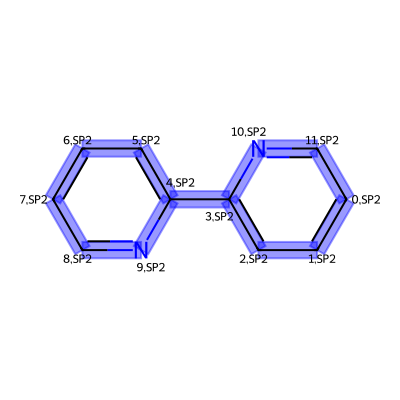

,index atome,symbole,e- valence,e- liants,charge formelle,doublets non-liants (DNL),lacunes ([]),nombre de liaisons,e- total (octet ?),O/H/D ?
0,0,C,4,4,0,0,0,4,8,✅ octet
1,1,C,4,4,0,0,0,4,8,✅ octet
2,2,C,4,4,0,0,0,4,8,✅ octet
3,3,C,4,4,0,0,0,4,8,✅ octet
4,4,C,4,4,0,0,0,4,8,✅ octet
5,5,C,4,4,0,0,0,4,8,✅ octet
6,6,C,4,4,0,0,0,4,8,✅ octet
7,7,C,4,4,0,0,0,4,8,✅ octet
8,8,C,4,4,0,0,0,4,8,✅ octet
9,9,N,5,3,0,1,0,3,8,✅ octet


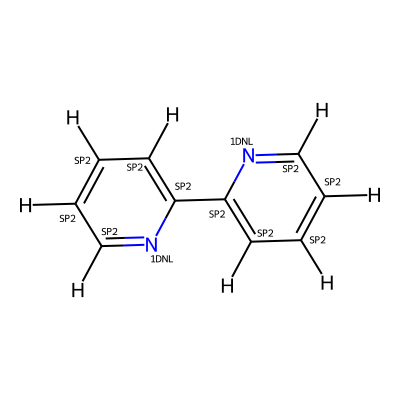

In [2]:
histidine = easy_rdkit("c2ccc(c1ccccn1)nc2")
histidine.show_mol(show_hybrid=True,plot_conjugation=True,show_n=True)
histidine.show_mol(show_Lewis=True)

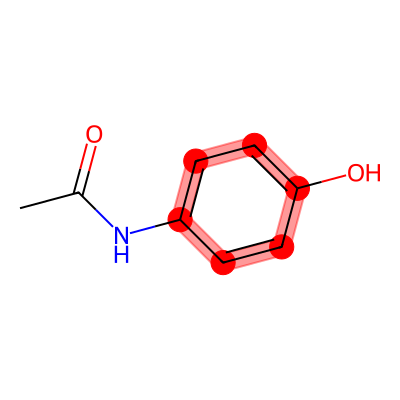

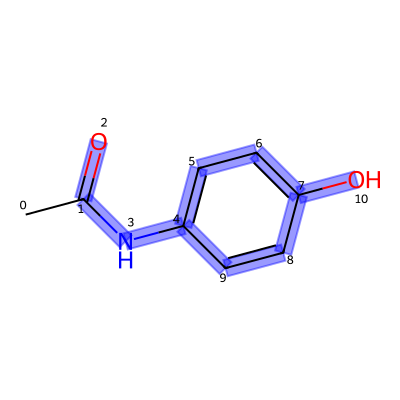

In [3]:

mol = easy_rdkit("CC(=O)NC1=CC=C(C=C1)O")
mol.show_mol(plot_aromatic=True)
mol.show_mol(plot_conjugation=True, show_n=True)


### à vous de jouer

il est recommandé de créer une cellule python par question résolue, afin de les exécuter les unes après les autres

In [4]:
# entrez votre code à partir d'ici

